In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

Filtered scale: [1.         1.13       1.143      1.24505    1.2482675  1.31439363
 1.29203777 1.30371322]


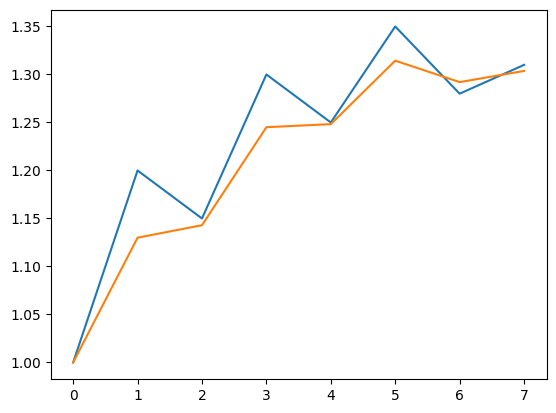

In [10]:
# Данные масштаба (пример)
scale_data = np.array([1.0, 1.2, 1.15, 1.3, 1.25, 1.35, 1.28, 1.31])
alpha = 0.65  # Коэффициент сглаживания

# Фильтрация
filtered_scale = np.zeros_like(scale_data)
filtered_scale[0] = scale_data[0]  # Начальное значение

for t in range(1, len(scale_data)):
    filtered_scale[t] = alpha * scale_data[t] + (1 - alpha) * filtered_scale[t - 1]

print("Filtered scale:", filtered_scale)
plt.plot(scale_data, label='Original')
plt.plot(filtered_scale, label='Filtered')

Filtered scale (Butterworth): [0.99310847 1.12306065 1.21148708 1.26089464 1.29086588 1.30598534
 1.30973928 1.31109653]


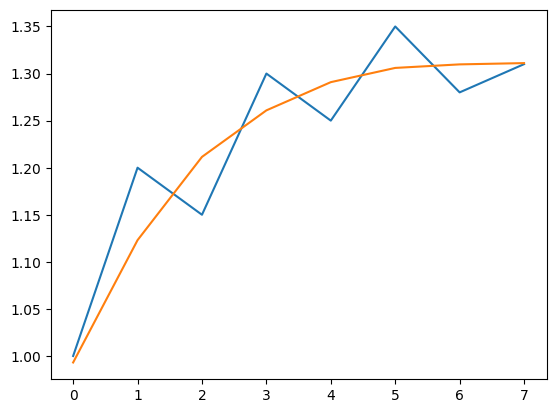

In [16]:
# Частота дискретизации и частота среза
sampling_rate = 50  # Гц (например, данные от дрона поступают 50 раз в секунду)
cutoff_frequency = 10  # Гц (частота среза)

# Расчет коэффициентов фильтра
b, a = butter(N=2, Wn=cutoff_frequency / (sampling_rate / 2), btype='low')

# Пример данных
scale_data = np.array([1.0, 1.2, 1.15, 1.3, 1.25, 1.35, 1.28, 1.31])

# Применение фильтрации
filtered_scale = filtfilt(b, a, scale_data, padlen=2)

print("Filtered scale (Butterworth):", filtered_scale)
plt.plot(scale_data, label='Original')
plt.plot(filtered_scale, label='Filtered')